# Problem Statement

**A NGO was able to raise around $10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, as a Data scientist,my job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then I would  suggest the countries which the CEO needs to focus on the most.**

# Loading Packages

In [1]:
library(tidyverse)
library(DataExplorer)
library(purrr)
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



# Exploring the Data

In [2]:
df <- read.csv('../input/unsupervised-learning-on-country-data/Country-data.csv')

meta_data <- read.csv('../input/unsupervised-learning-on-country-data/data-dictionary.csv')

In [3]:
meta_data

Column.Name,Description
<chr>,<chr>
country,Name of the country
child_mort,Death of children under 5 years of age per 1000 live births
exports,Exports of goods and services per capita. Given as %age of the GDP per capita
health,Total health spending per capita. Given as %age of GDP per capita
imports,Imports of goods and services per capita. Given as %age of the GDP per capita
Income,Net income per person
Inflation,The measurement of the annual growth rate of the Total GDP
life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.


Shows the basic contents of the data

In [4]:
head(df)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
3,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
5,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
6,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


In [5]:
introduce(df)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
167,10,1,9,0,0,167,1670,25112


We find that there is no missing columns or data.Hence we can move ahead with more inferences

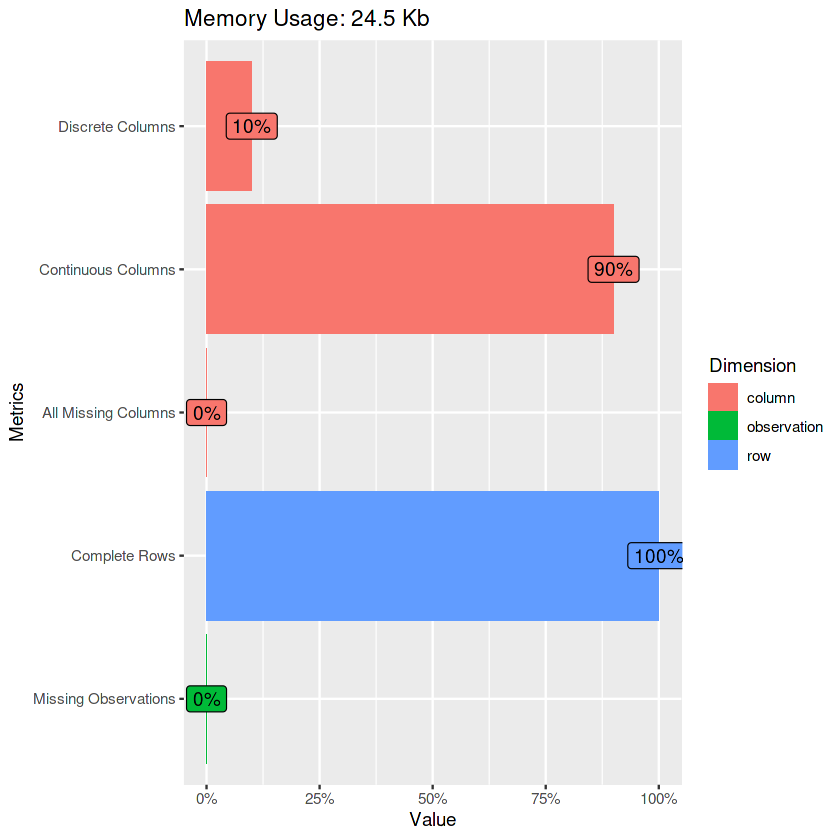

In [6]:
plot_intro(df)

We can see drastic differences in Child mortality,Life Expectancy,Income,Total Fertility etc - showcasing large inequalities among countries world over.

In [7]:
summary(df)

   country            child_mort        exports            health      
 Length:167         Min.   :  2.60   Min.   :  0.109   Min.   : 1.810  
 Class :character   1st Qu.:  8.25   1st Qu.: 23.800   1st Qu.: 4.920  
 Mode  :character   Median : 19.30   Median : 35.000   Median : 6.320  
                    Mean   : 38.27   Mean   : 41.109   Mean   : 6.816  
                    3rd Qu.: 62.10   3rd Qu.: 51.350   3rd Qu.: 8.600  
                    Max.   :208.00   Max.   :200.000   Max.   :17.900  
    imports             income         inflation         life_expec   
 Min.   :  0.0659   Min.   :   609   Min.   : -4.210   Min.   :32.10  
 1st Qu.: 30.2000   1st Qu.:  3355   1st Qu.:  1.810   1st Qu.:65.30  
 Median : 43.3000   Median :  9960   Median :  5.390   Median :73.10  
 Mean   : 46.8902   Mean   : 17145   Mean   :  7.782   Mean   :70.56  
 3rd Qu.: 58.7500   3rd Qu.: 22800   3rd Qu.: 10.750   3rd Qu.:76.80  
 Max.   :174.0000   Max.   :125000   Max.   :104.000   Max.   :82.80  

In [8]:
df_num <- df %>% select(-c(country))

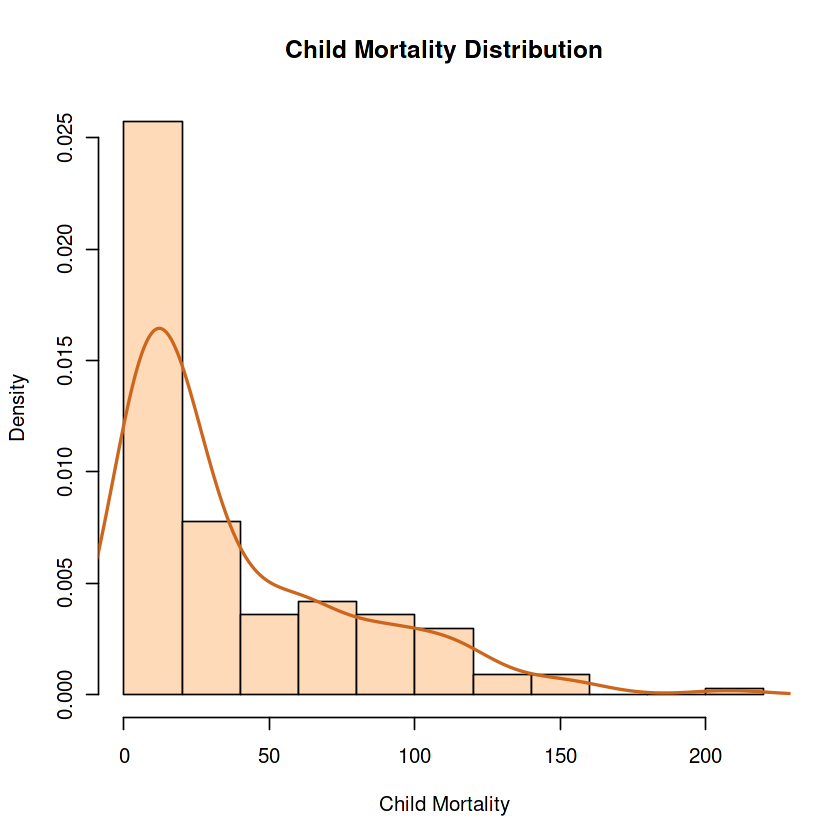

In [9]:
hist(df_num$child_mort, # histogram
 col="peachpuff", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = "Child Mortality",
 main = "Child Mortality Distribution")
lines(density(df_num$child_mort), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")

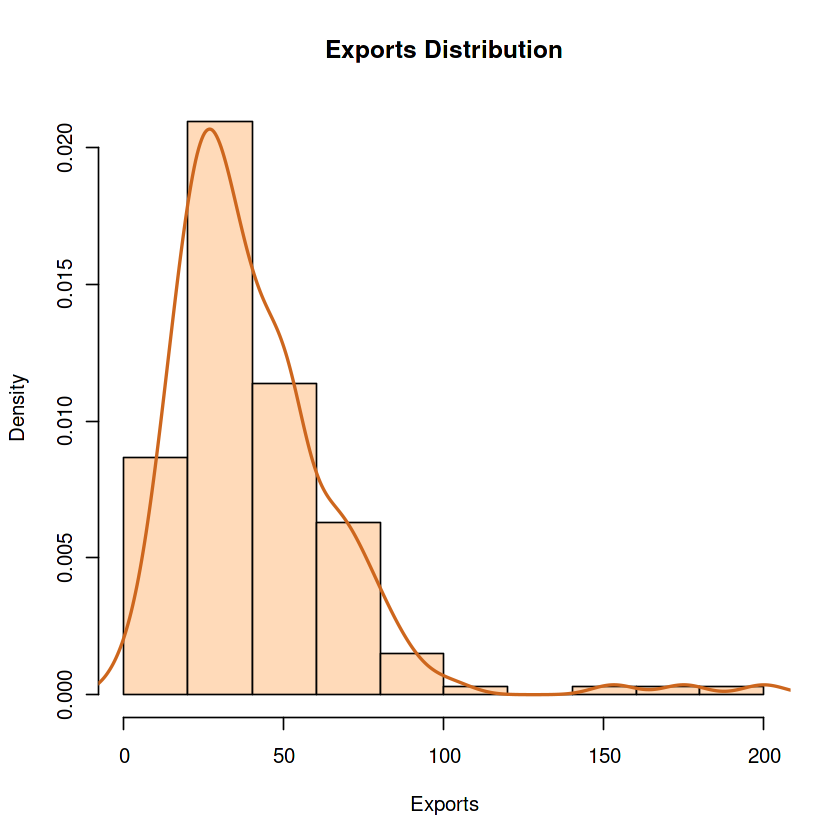

In [10]:
hist(df_num$exports, # histogram
 col="peachpuff", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = "Exports",
 main = "Exports Distribution")
lines(density(df_num$exports), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")

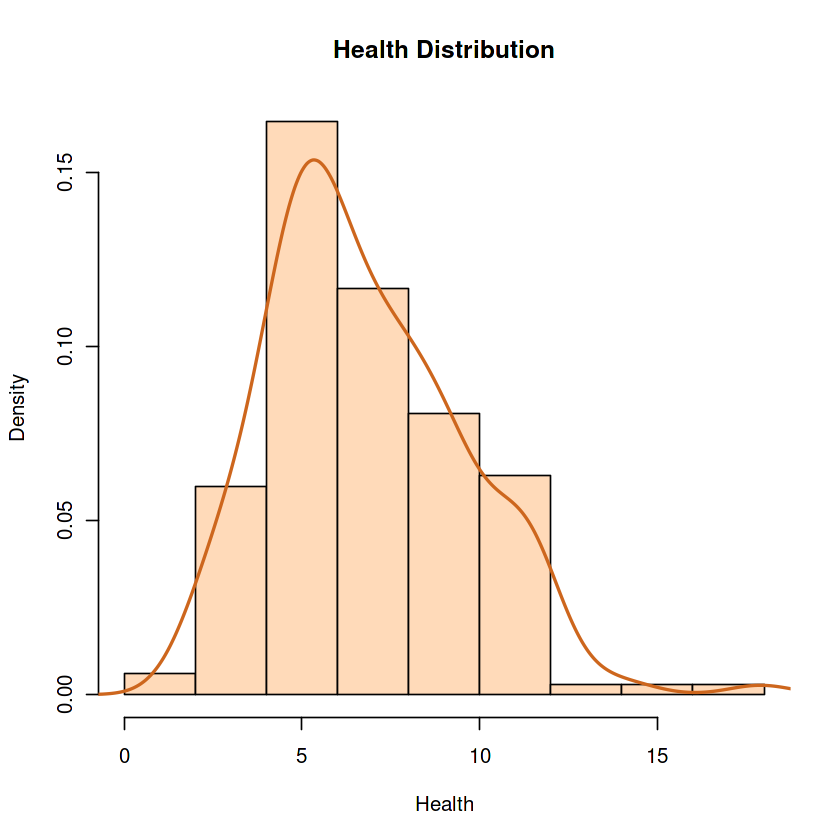

In [11]:
hist(df_num$health, # histogram
 col="peachpuff", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = "Health",
 main = "Health Distribution")
lines(density(df_num$health), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")

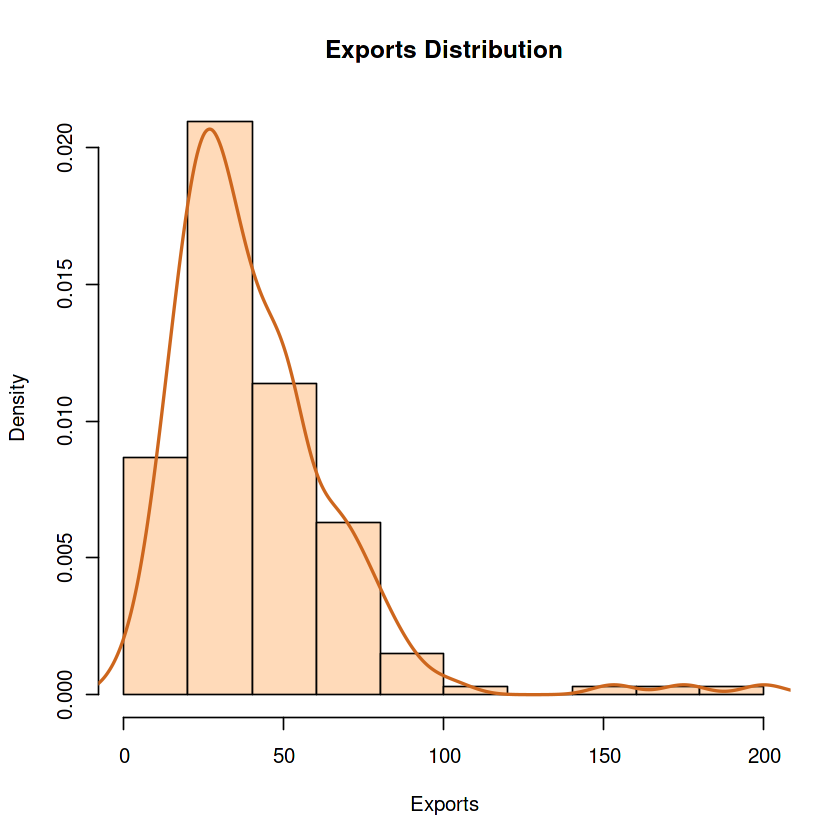

In [12]:
hist(df_num$exports, # histogram
 col="peachpuff", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = "Exports",
 main = "Exports Distribution")
lines(density(df_num$exports), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")

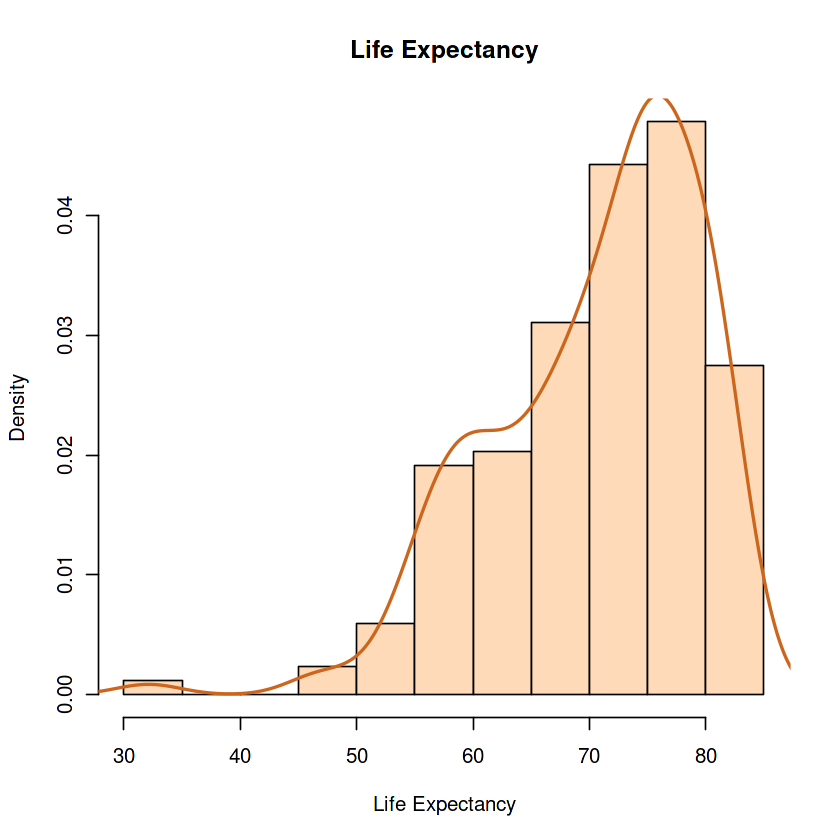

In [13]:
hist(df_num$life_expec, # histogram
 col="peachpuff", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = "Life Expectancy",
 main = "Life Expectancy")
lines(density(df_num$life_expec), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")

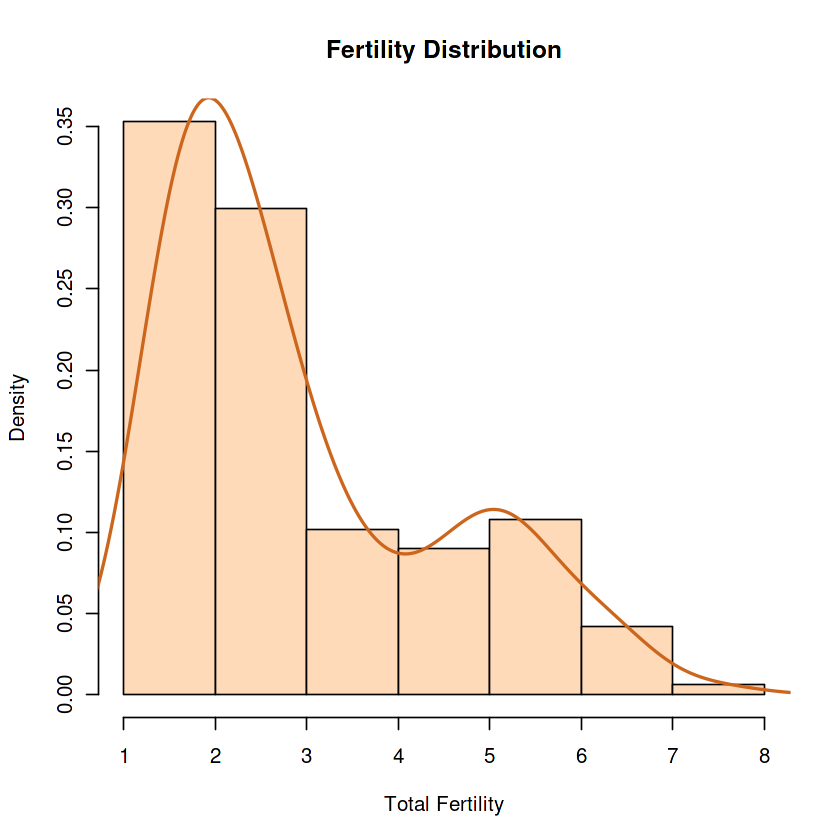

In [14]:
hist(df_num$total_fer, # histogram
 col="peachpuff", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = "Total Fertility",
 main = "Fertility Distribution")
lines(density(df_num$total_fer), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")

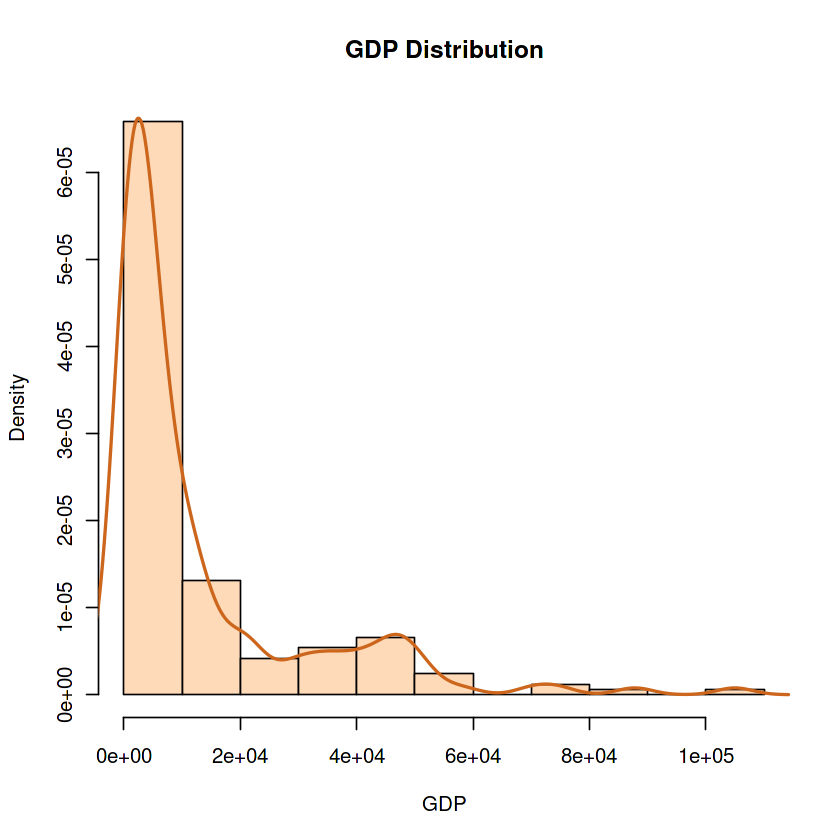

In [15]:
hist(df_num$gdpp, # histogram
 col="peachpuff", # column color
 border="black",
 prob = TRUE, # show densities instead of frequencies
 xlab = "GDP",
 main = "GDP Distribution")
lines(density(df_num$gdpp), # density plot
 lwd = 2, # thickness of line
 col = "chocolate3")

**Child Mortality of various Nations**- 

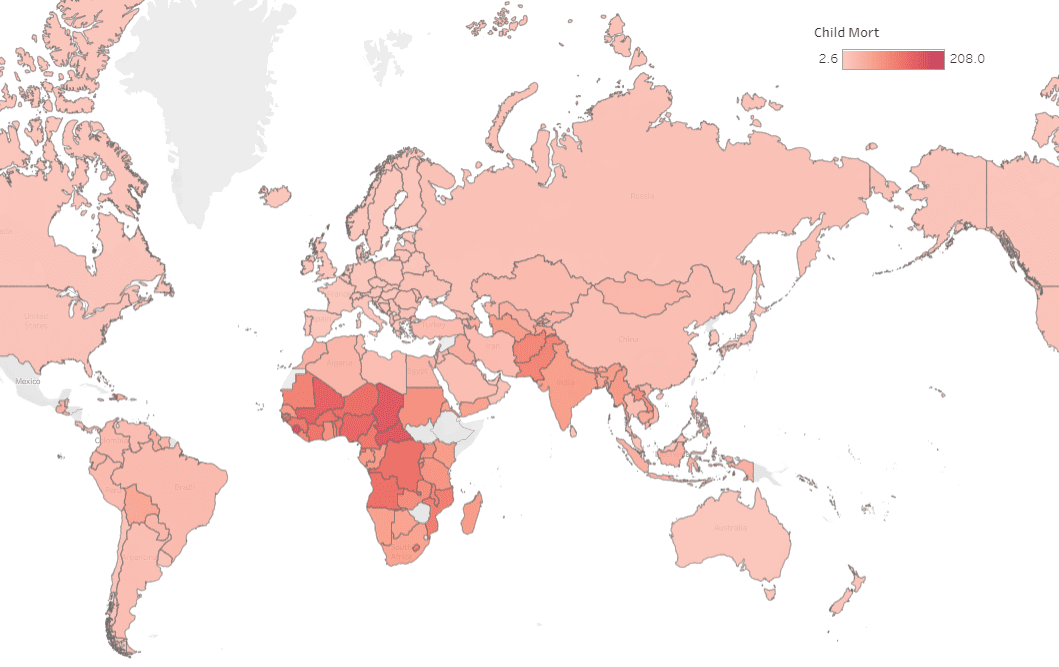

**GDP per Capita of nations shows vast inequality with Western world having large incomes at disposal**

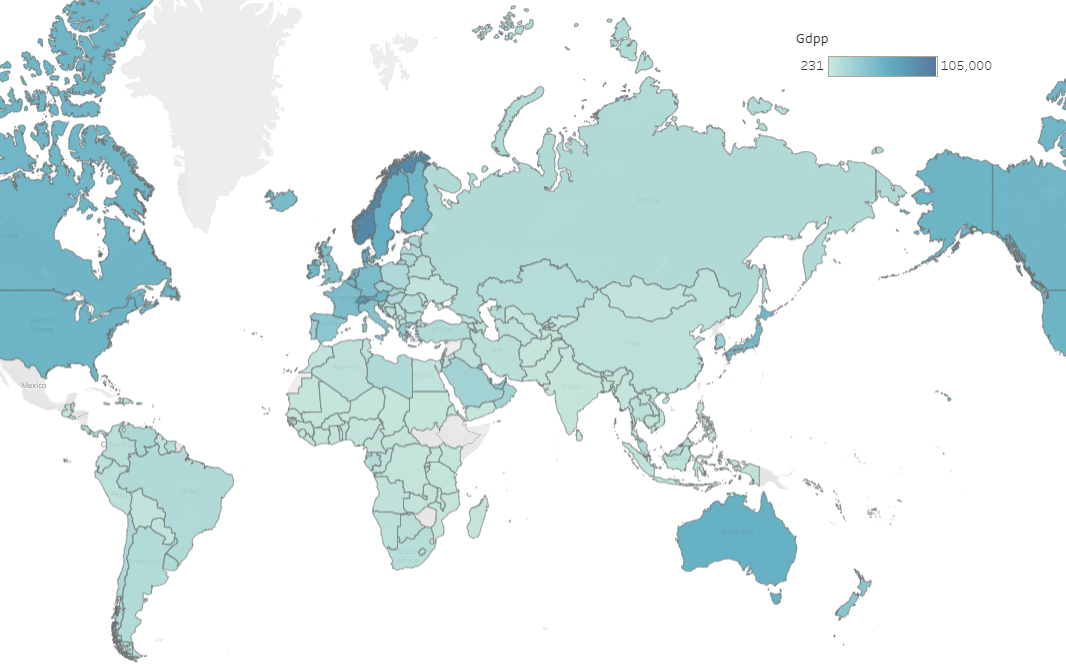

**Life Expectancy**

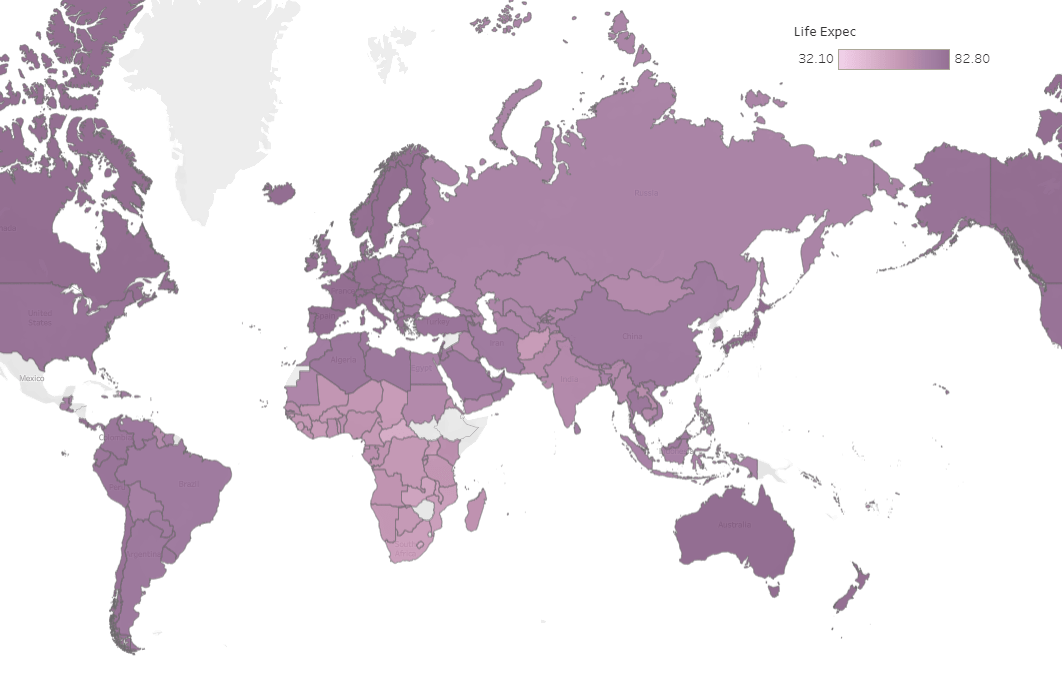

**Fertility Levels**

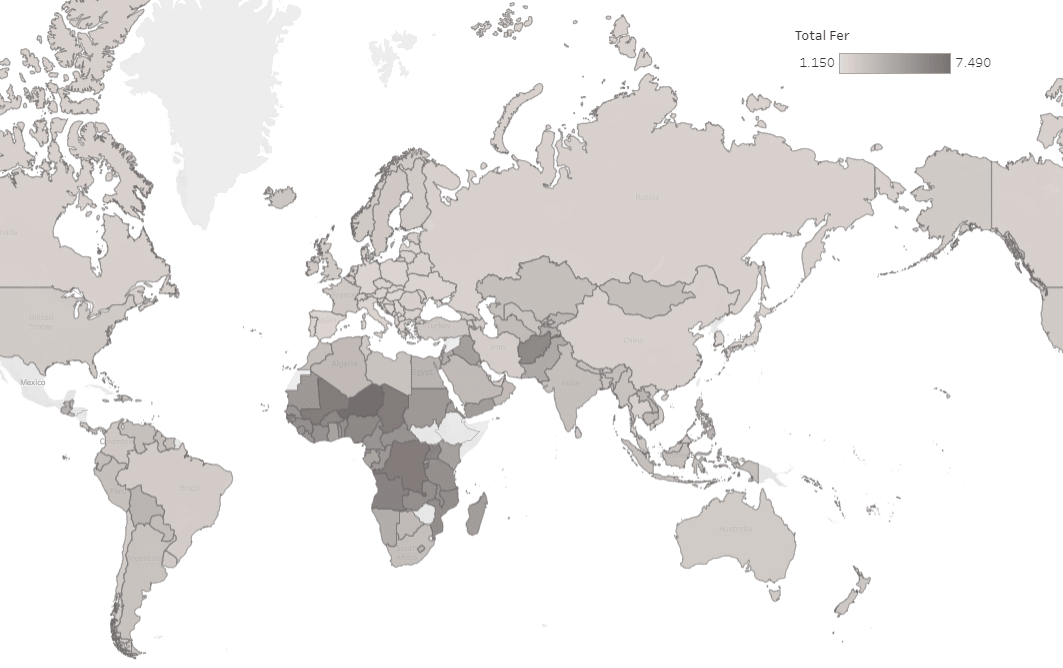

**Income Levels Distribution**

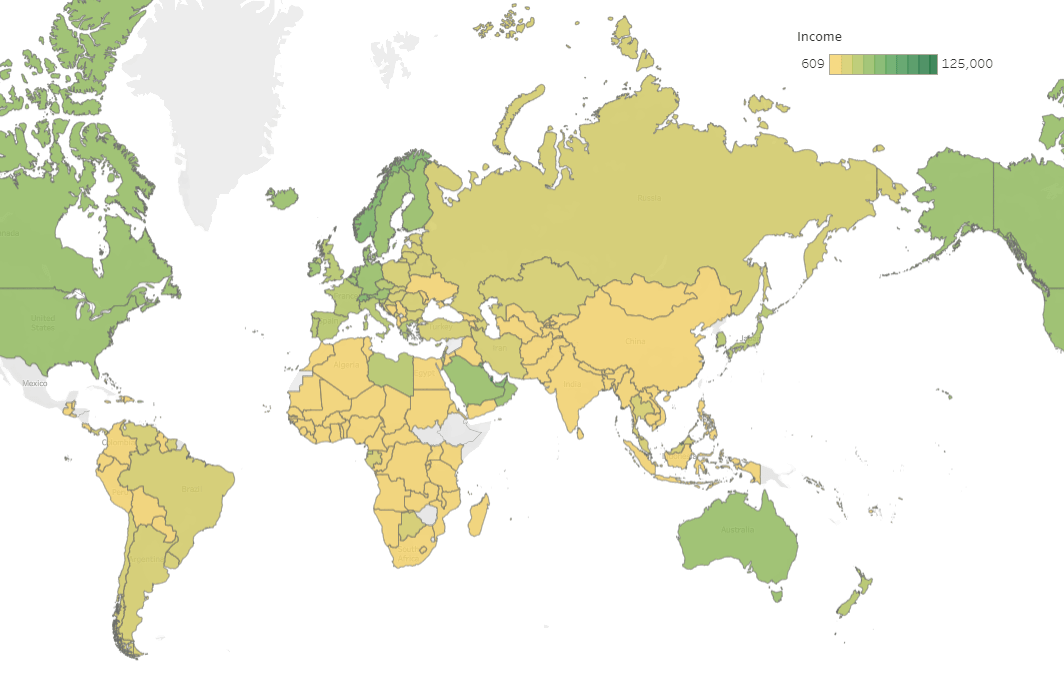

**Scaing the numeric values so that large differences in data values are minimizzed.Since categorical values cannot be scaled,we have removed the Country variable earlier.**

In [16]:
df_scaled <- scale(df_num)
head(df_scaled)

child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1.2876597,-1.13486665,0.27825140,-0.08220771,-0.80582187,0.1568645,-1.6142372,1.89717646,-0.67714308
-0.5373329,-0.47822017,-0.09672528,0.07062429,-0.37424335,-0.3114109,0.6459238,-0.85739418,-0.48416709
-0.2720146,-0.09882442,-0.96317624,-0.63983800,-0.22018227,0.7869076,0.6684130,-0.03828924,-0.46398018
2.0017872,0.77305618,-1.44372888,-0.16481961,-0.58328920,1.3828944,-1.1756985,2.12176975,-0.51472026
-0.6935483,0.16018613,-0.28603389,0.49607554,0.10142673,-0.5999442,0.7021467,-0.54032130,-0.04169175
-0.5894047,-0.81019144,0.46756001,-1.27594958,0.08067776,1.2409928,0.5897009,-0.38178486,-0.14535428


# Determining Optimal Clusters :

The following are the 3 methods to determine the optimal number of clusters.

They are :

* Elbow Method
* Silhoutte Method
* Gap Statistic


# Elbow Method

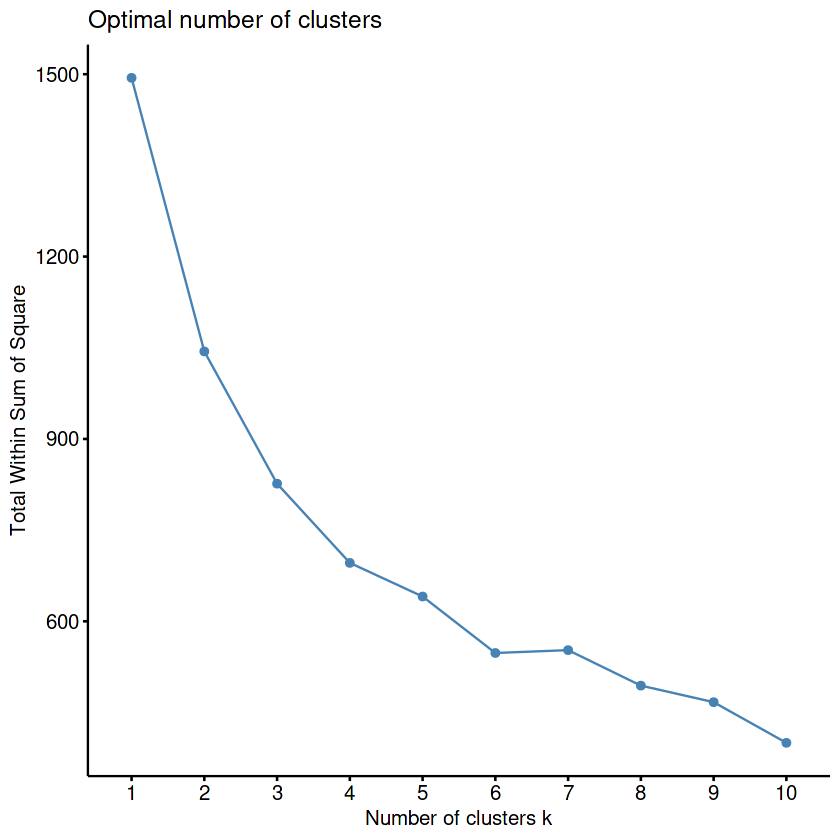

In [17]:
set.seed(123)
fviz_nbclust(df_scaled,kmeans,method = 'wss')

# Average Silhouette Method

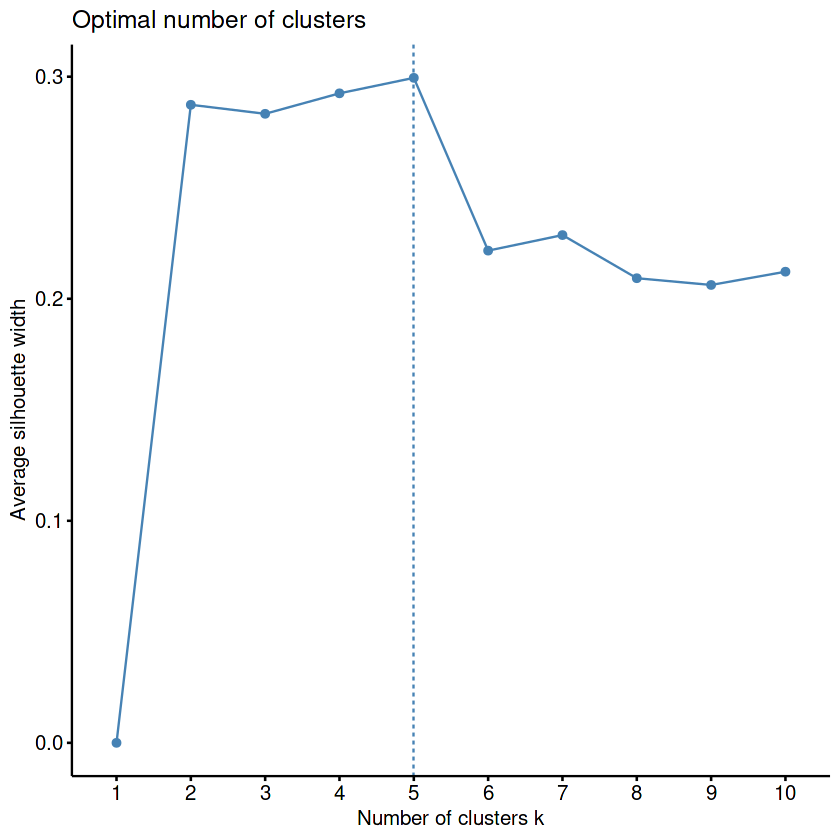

In [18]:
fviz_nbclust(df_scaled, kmeans, method = "silhouette")

# Gap Statistic Method

In [19]:
 #compute gap statistic
set.seed(123)
gap_stat <- clusGap(df_scaled, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = df_scaled, FUNcluster = kmeans, K.max = 10, B = 50,     nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 3
          logW   E.logW       gap     SE.sim
 [1,] 5.057995 5.821906 0.7639116 0.01710194
 [2,] 4.863245 5.675539 0.8122942 0.01551801
 [3,] 4.730997 5.595964 0.8649671 0.01526388
 [4,] 4.671201 5.531426 0.8602249 0.01537190
 [5,] 4.634125 5.477994 0.8438689 0.01599587
 [6,] 4.559546 5.431367 0.8718212 0.01725260
 [7,] 4.514117 5.390640 0.8765232 0.01763956
 [8,] 4.469391 5.354259 0.8848682 0.01785610
 [9,] 4.421814 5.321618 0.8998041 0.01722314
[10,] 4.383872 5.291923 0.9080513 0.01699773


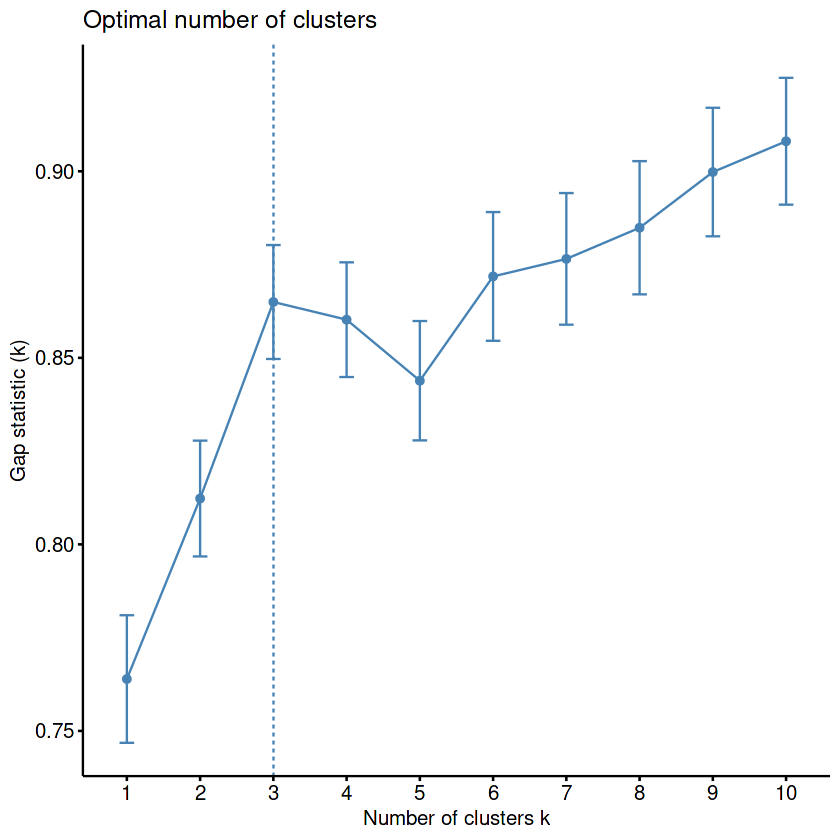

In [20]:
fviz_gap_stat(gap_stat)

# K-means Clustering

**The above 3 methods gave different numbers of clusters to be used. I am trying to average out the results to 4 clusters**

In [21]:
set.seed(123)
final <- kmeans(df_scaled, 4, nstart = 25)
print(final)

K-means clustering with 4 clusters of sizes 30, 87, 47, 3

Cluster means:
  child_mort      exports       health     imports     income   inflation
1 -0.8261247  0.172103053  0.856613486 -0.29548409  1.4578905 -0.47675466
2 -0.4185681  0.006628559 -0.211088772  0.04743879 -0.2166227 -0.03484844
3  1.3561391 -0.436221182 -0.155516293 -0.18863644 -0.6848344  0.40090504
4 -0.8464575  4.920873128 -0.008138555  4.53442030  2.4322274 -0.50269428
  life_expec  total_fer       gdpp
1  1.1043279 -0.7613916  1.6569189
2  0.2676147 -0.4369082 -0.3298134
3 -1.2783352  1.3608511 -0.6024306
4  1.2231457 -1.0357477  2.4334786

Clustering vector:
  [1] 3 2 2 3 2 2 2 1 1 2 2 2 2 2 2 1 2 3 2 2 2 3 2 1 2 3 3 2 3 1 2 3 3 2 2 2 3
 [38] 3 3 2 3 2 1 2 1 2 2 2 2 3 3 2 2 1 1 3 3 2 1 3 1 2 2 3 3 2 3 2 1 2 2 2 3 1
 [75] 1 1 2 1 2 2 3 3 1 2 3 2 2 3 3 2 2 4 2 3 3 2 2 3 4 3 2 2 2 2 2 2 3 2 3 2 1
[112] 1 3 3 1 2 3 2 2 2 2 2 1 1 2 2 3 2 2 3 2 2 3 4 2 1 2 3 1 1 2 2 3 2 1 1 2 3
[149] 2 3 3 2 2 2 2 3 2 1 1 1 2 2 2 2 2 3

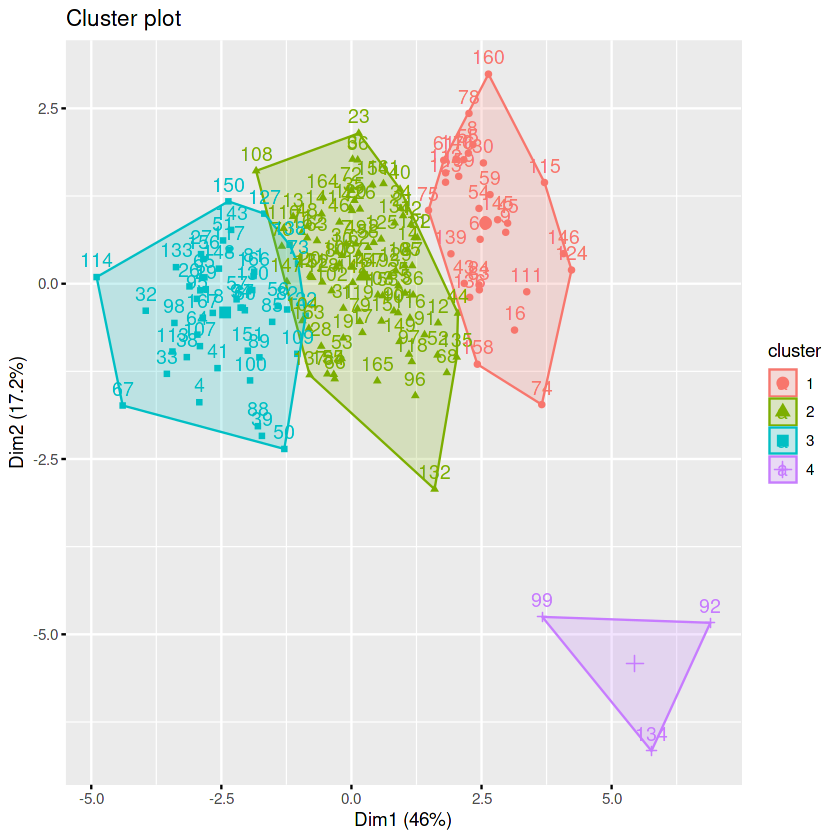

In [22]:
fviz_cluster(final, data = df_scaled)

**Above has showed that cluster 4 has just values and they could be probably incorporated into cluster 1 since they have simialr values in standards of living - the countries in cluster 4 are - Monaco , Singapore , Luxemborg which are very wealthy nations in per capita income and GDPP**

**In the following we will create row names displaying the name of countries**

In [23]:
df_final <- df_scaled
rownames(df_final) <- df$country 

**Clustering of variables**

In [24]:
final$cluster

[1] 3 2 2 3 2 2 2 1 1 2 2 2 2 2 2 1 2 3 2 2 2 3 2 1 2 3 3 2 3 1 2 3 3 2 2 2 3
 [38] 3 3 2 3 2 1 2 1 2 2 2 2 3 3 2 2 1 1 3 3 2 1 3 1 2 2 3 3 2 3 2 1 2 2 2 3 1
 [75] 1 1 2 1 2 2 3 3 1 2 3 2 2 3 3 2 2 4 2 3 3 2 2 3 4 3 2 2 2 2 2 2 3 2 3 2 1
[112] 1 3 3 1 2 3 2 2 2 2 2 1 1 2 2 3 2 2 3 2 2 3 4 2 1 2 3 1 1 2 2 3 2 1 1 2 3
[149] 2 3 3 2 2 2 2 3 2 1 1 1 2 2 2 2 2 3 3

In [25]:
cluster_data <- as.data.frame(final$cluster)

head(cluster_data)

,final$cluster
,<int>
1,3
2,2
3,2
4,3
5,2
6,2


**We are using only 3 clusters now as mentioned above for practical purposes as Cluster 4 does not skew the data so much and no necessary for final analysis.**

In [26]:
set.seed(123)
final <- kmeans(df_final, 3, nstart = 25)
print(final)

K-means clustering with 3 clusters of sizes 36, 84, 47

Cluster means:
  child_mort     exports     health     imports     income   inflation
1 -0.8249676  0.64314557  0.7252301  0.19006732  1.4797922 -0.48346661
2 -0.4052346 -0.03155768 -0.2237978  0.02408916 -0.2510155 -0.01711594
3  1.3561391 -0.43622118 -0.1555163 -0.18863644 -0.6848344  0.40090504
  life_expec  total_fer       gdpp
1  1.0763414 -0.7895024  1.6111498
2  0.2539698 -0.4230704 -0.3534185
3 -1.2783352  1.3608511 -0.6024306

Clustering vector:
                   Afghanistan                        Albania 
                             3                              2 
                       Algeria                         Angola 
                             2                              3 
           Antigua and Barbuda                      Argentina 
                             2                              2 
                       Armenia                      Australia 
                             2              

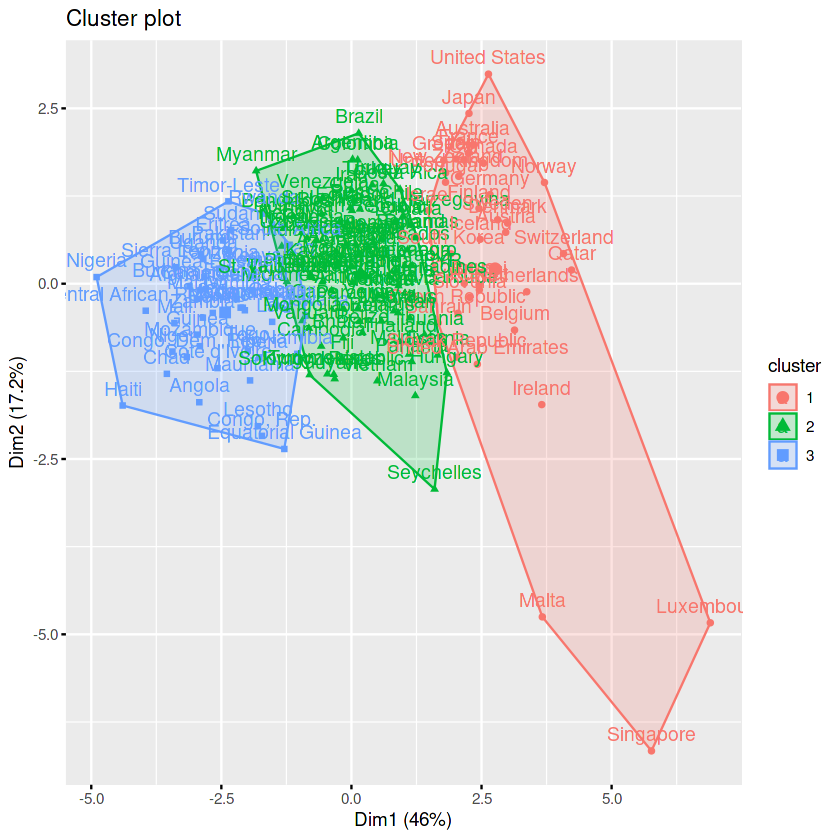

In [27]:
fviz_cluster(final, data = df_final)

In [28]:
cluster_data <- as.data.frame(final$cluster)

head(cluster_data)

,final$cluster
,<int>
Afghanistan,3
Albania,2
Algeria,2
Angola,3
Antigua and Barbuda,2
Argentina,2


**We are binding the dataframes with country names and clusters and K means associated data**

In [29]:
total_df <- cbind(df,cluster_data)

In [30]:
head(total_df)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,final$cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
Afghanistan,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
Albania,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
Antigua and Barbuda,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
Argentina,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,2


In [31]:
#Renaming the column of cluster 

colnames(total_df)[11] <- "cluster"
colnames(total_df)

[1] "country"    "child_mort" "exports"    "health"     "imports"   
 [6] "income"     "inflation"  "life_expec" "total_fer"  "gdpp"      
[11] "cluster"

**Here we are aggregating the clusters into mean values to determine the differences and range of values associated with Clusters(Group.1)**

In [32]:
aggregate(total_df[, 2:10], list(total_df$cluster), mean)

Group.1,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.00000,58.73889,8.807778,51.49167,45672.222,2.671250,80.12778,1.752778,42494.444
2,21.92738,40.24392,6.200952,47.47340,12305.595,7.600905,72.81429,2.307500,6486.452
3,92.96170,29.15128,6.388511,42.32340,3942.404,12.019681,59.18723,5.008085,1922.383


Based on the above clustering we can observe that :

CLuster 1 :

* Low Mortality
* High Exports
* Healthier Population
* High Imports
* High Income countries
* Low rates of Inflation
* High Life expectancy of individuals
* Very Low Fertility rates since 2.0 is the average replacement rate
* High GDP per capita 

Cluster 2 :

* Moderate child mortality
* Higher exports than cluster 3 but lesser than cluster 1
* Fairly healthy population
* Higher imports than exports leading to deficit
* Income levels are 4 times than cluster 3 but almost 3.5 lesser than Cluster 1 
* Moderate inflation levels which can decrease incomes/savings of individuals
* Replacement level of fertility 
* GDP Per Capita is 7 times lower than cluster 1 and 3.5 times higher than cluster 3

Cluster 3 :

* High child mortality rates
* Low exports compared to Cluster 2 and 3 
* Low levels of health indicators
* Imports are almost double the exports leading to large deficit in trade and imbalaces and unemployment
* Fairly low levels of income levels
* Very high inflation levels leading to lower incomes
* High amount of fertility could lead to over population and stress on limited resources
* Low GDP Per Capita



In [33]:
str(total_df)

'data.frame':	167 obs. of  11 variables:
 $ country   : chr  "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ child_mort: num  90.2 16.6 27.3 119 10.3 14.5 18.1 4.8 4.3 39.2 ...
 $ exports   : num  10 28 38.4 62.3 45.5 18.9 20.8 19.8 51.3 54.3 ...
 $ health    : num  7.58 6.55 4.17 2.85 6.03 8.1 4.4 8.73 11 5.88 ...
 $ imports   : num  44.9 48.6 31.4 42.9 58.9 16 45.3 20.9 47.8 20.7 ...
 $ income    : int  1610 9930 12900 5900 19100 18700 6700 41400 43200 16000 ...
 $ inflation : num  9.44 4.49 16.1 22.4 1.44 20.9 7.77 1.16 0.873 13.8 ...
 $ life_expec: num  56.2 76.3 76.5 60.1 76.8 75.8 73.3 82 80.5 69.1 ...
 $ total_fer : num  5.82 1.65 2.89 6.16 2.13 2.37 1.69 1.93 1.44 1.92 ...
 $ gdpp      : int  553 4090 4460 3530 12200 10300 3220 51900 46900 5840 ...
 $ cluster   : int  3 2 2 3 2 2 2 1 1 2 ...


**We will factor the cluster values for easier data analysis**

In [34]:
total_df$cluster <- factor(total_df$cluster)

In [35]:
str(total_df)

'data.frame':	167 obs. of  11 variables:
 $ country   : chr  "Afghanistan" "Albania" "Algeria" "Angola" ...
 $ child_mort: num  90.2 16.6 27.3 119 10.3 14.5 18.1 4.8 4.3 39.2 ...
 $ exports   : num  10 28 38.4 62.3 45.5 18.9 20.8 19.8 51.3 54.3 ...
 $ health    : num  7.58 6.55 4.17 2.85 6.03 8.1 4.4 8.73 11 5.88 ...
 $ imports   : num  44.9 48.6 31.4 42.9 58.9 16 45.3 20.9 47.8 20.7 ...
 $ income    : int  1610 9930 12900 5900 19100 18700 6700 41400 43200 16000 ...
 $ inflation : num  9.44 4.49 16.1 22.4 1.44 20.9 7.77 1.16 0.873 13.8 ...
 $ life_expec: num  56.2 76.3 76.5 60.1 76.8 75.8 73.3 82 80.5 69.1 ...
 $ total_fer : num  5.82 1.65 2.89 6.16 2.13 2.37 1.69 1.93 1.44 1.92 ...
 $ gdpp      : int  553 4090 4460 3530 12200 10300 3220 51900 46900 5840 ...
 $ cluster   : Factor w/ 3 levels "1","2","3": 3 2 2 3 2 2 2 1 1 2 ...


**Since Clusters are categorised as 1,2,3 - We will change them as High Income ,Middle Income , Low Income countries respectively. It would then help us to pinpoint the exact countries in visualization.**

In [36]:
total_df$cluster <- recode(total_df$cluster, '1' = "High Income", '2' = "Middle Income", '3' = "Low Income")

In [37]:
head(total_df)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<fct>
Afghanistan,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Low Income
Albania,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Middle Income
Algeria,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Middle Income
Angola,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Low Income
Antigua and Barbuda,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Middle Income
Argentina,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,Middle Income


In [38]:
#Exporting the final data into csv file - it is present in Output part of the right side bar

write.csv(total_df, "clustering.csv", row.names = F)

# Conclusion

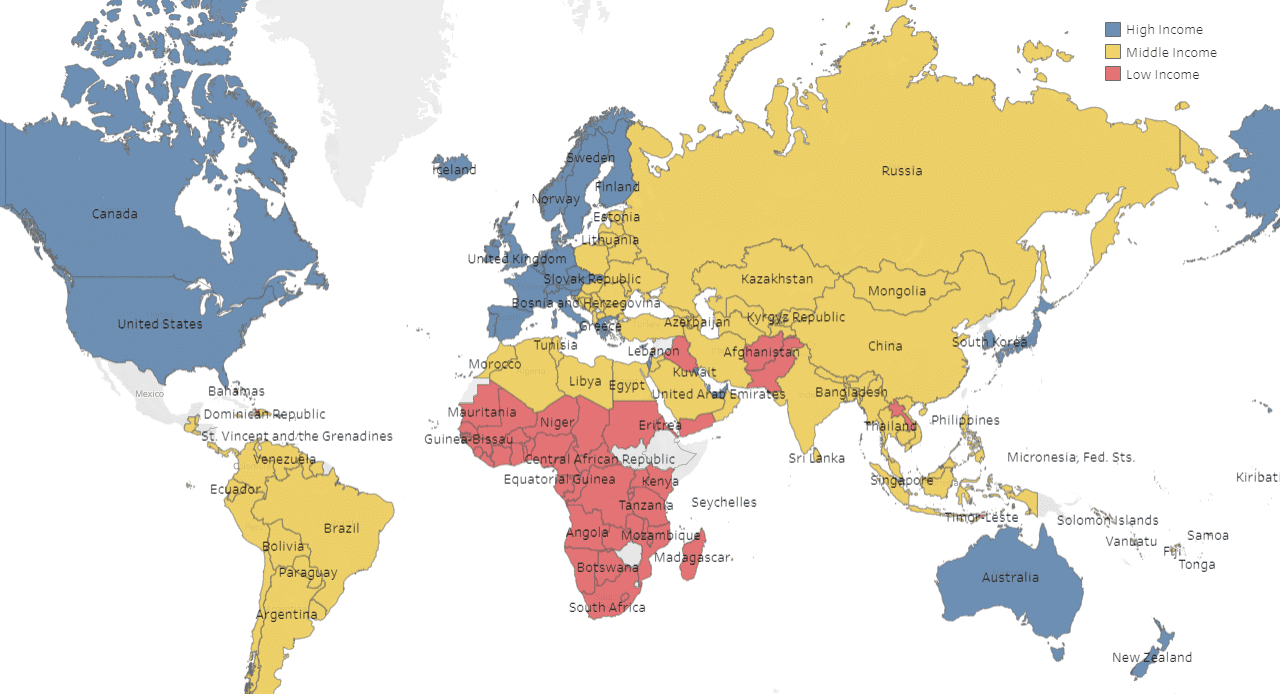

**Therefore by focusing our efforts on the above Low Income countries, we can help the NGO to properly allocate their resources and help to improve the lives of necessary people henceforth.**